<a href="https://colab.research.google.com/github/williamstophef/AI-ML-Colab-Notebooks/blob/main/01_pytorch_workflow_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn #nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt
torch.__version__

'2.6.0+cu124'

In [2]:
##Linear Regression formula Y = a + bX
#Create known parameters
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
Y = weight * X + bias

X[:10], Y[:10], len(X), len(Y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

### Splitting data into training and test sets



In [3]:
train_split = int(0.8 * len(X))
X_train, Y_train = X[:train_split], Y[:train_split]
X_test, Y_test = X[train_split:], Y[train_split:]

len(X_train), len(Y_train), len(X_test), len(Y_test)

(40, 40, 10, 10)

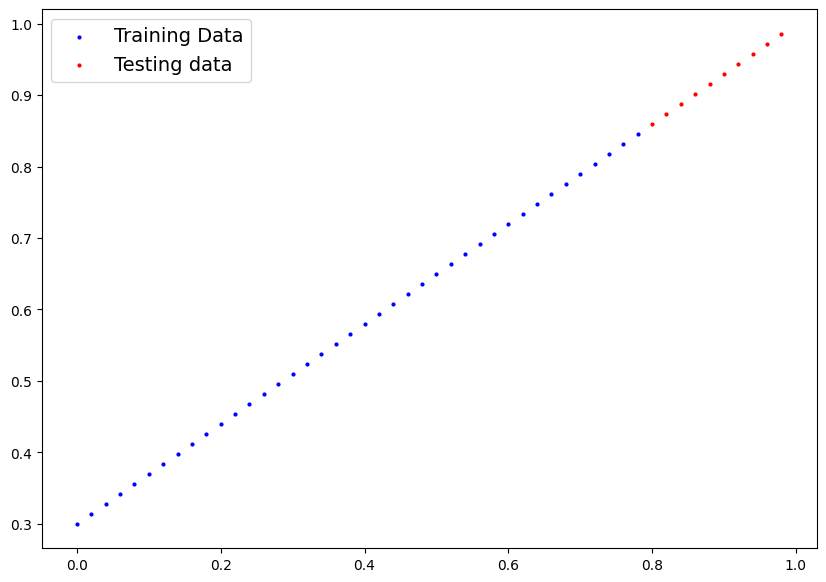

In [4]:
def plot_prediction(train_data=X_train,
                    train_labels=Y_train,
                    test_data=X_test,
                    test_labels=Y_test,
                    predictions=None):
  """Plots training data, test data and compares predictions"""
  plt.figure(figsize=(10, 7))

  #Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training Data")

  #Plot test data in Green
  plt.scatter(test_data, test_labels, c="r", s=4, label="Testing data")

  #Are there predictions
  if predictions is not None:
    #Plot the prediciotns if they exist
    plt.scatter(test_data, predictions, c="g", s=4, label="Predictions")

  plt.legend(prop={"size": 14})

plot_prediction();

## Build 1st PyTorch model!

In [5]:
#Create a linear regression model class
class LinearRegressionModel(nn.Module):#almost everything in PyTorch inherts from nn.Module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                           requires_grad=True,
                                           dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))
    #Forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: #<- "x" is the input data
    return self.weights * x + self.bias#Linear regression formula

##Pytroch model building essential
torch.nn - contains all of the buildings for computational graphs (a neural network can be considered computational graph)
torch.nn.Parameter - what parameters should our model try and learn, often a PyTorch layer from torch.nn will set these for us
torch.nn.Module - The base class for all neural network modules, if you subclass it you should overwrite forward
torch.optim - this where the optimizers in PyTorch live they will help with gradient descent
def forward() - All nn.Module subcalsses require you to overwrite forward(), this method defines what happens in the forward computation

In [6]:
torch.manual_seed(42)

model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [7]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

###MAking predictions using torch.inference_mode()

In [8]:
X_test, Y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [9]:
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

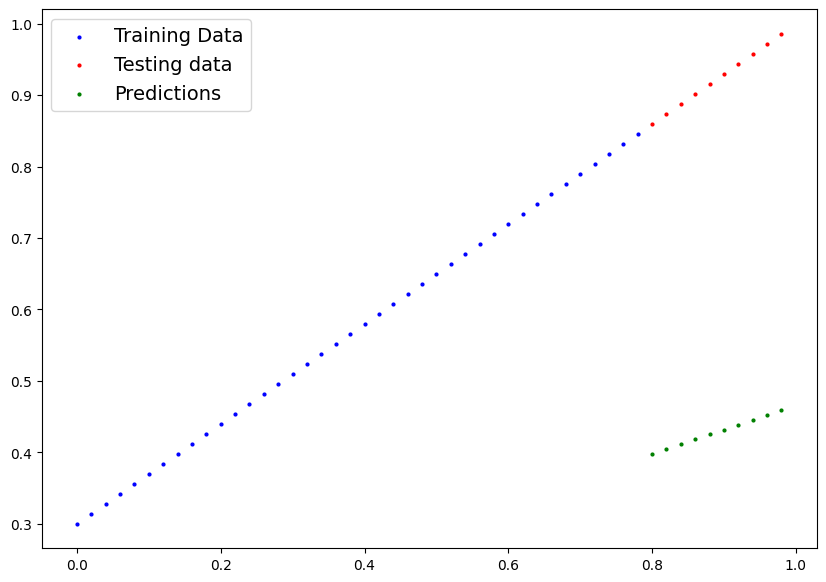

In [10]:
plot_prediction(predictions=y_preds)

##Train model

In [11]:
#Setup a loss function
loss_fn = nn.L1Loss()
# Setup an Optimzer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)

###Build a training loop and testing loop
0. Loop through the data
1. forward pass (this involves data moving through our model's forward functions) Make prediciotns
2. Calculate  the loss
3. Optimzer zero grad
4. Loss backwards - move backwards through the network to calculate the gradient of each of the parameter of our model with respect to the loss(backpropagation)
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss(gradient dexcent)


In [12]:
#Loop through the data
epochs = 225

#Track values
epoch_count = []
loss_values = []
test_loss_values = []

#Loop through the data
for epoch in range(epochs):
  # Set the model to training mode
  model_0.train()# train mode in PyTorch sets all parameters that require gradients to gradients

  # Forward pass
  Y_pred = model_0(X_train)

  #2. Calculate the loss
  loss = loss_fn(Y_pred, Y_train)

  #3. Optimizer zero grad
  optimizer.zero_grad()

  #4. Perform backpropagation on the loss with the respect to the parameters of the model
  loss.backward()

  #5. Step the optimizer(perform gradient descent)
  optimizer.step()

  ###Testing
  model_0.eval()#Turns off different settings in the model not needed for evaluation/testing
  with torch.inference_mode(): #Turns off gradient tracking & a couple more things behind the scenes
    # 1 do forward pass
    test_pred = model_0(X_test)

    #Calculate the loss
    test_loss = loss_fn(test_pred, Y_test)

  #Prints out what is happeneing
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Test: {loss} | Test loss: {test_loss}")
    # model_0.eval() #Turns off gradient tracking
    print(model_0.state_dict())

Epoch: 0 | Test: 0.31288138031959534 | Test loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | Test: 0.1976713240146637 | Test loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 | Test: 0.08908725529909134 | Test loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30 | Test: 0.053148526698350906 | Test loss: 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40 | Test: 0.04543796554207802 | Test loss: 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50 | Test: 0.04167863354086876 | Test loss: 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60 | Test: 0.03818932920694351 | Test loss: 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788

In [13]:
model_0.state_dict()
import numpy as np

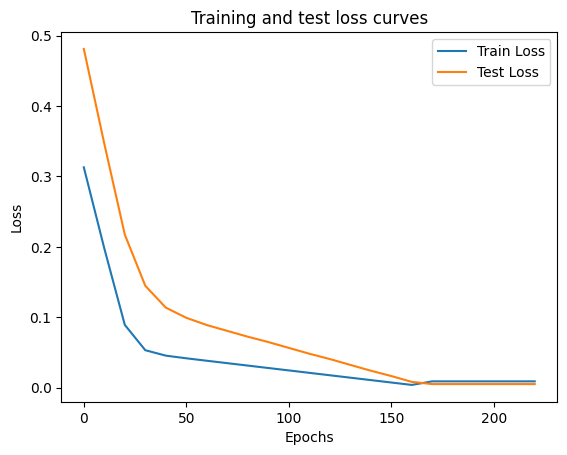

In [14]:
#Plot the loss curve
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train Loss")
plt.plot(epoch_count, test_loss_values, label="Test Loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

In [15]:
with torch.inference_mode():
  Y_preds_new = model_0(X_test)

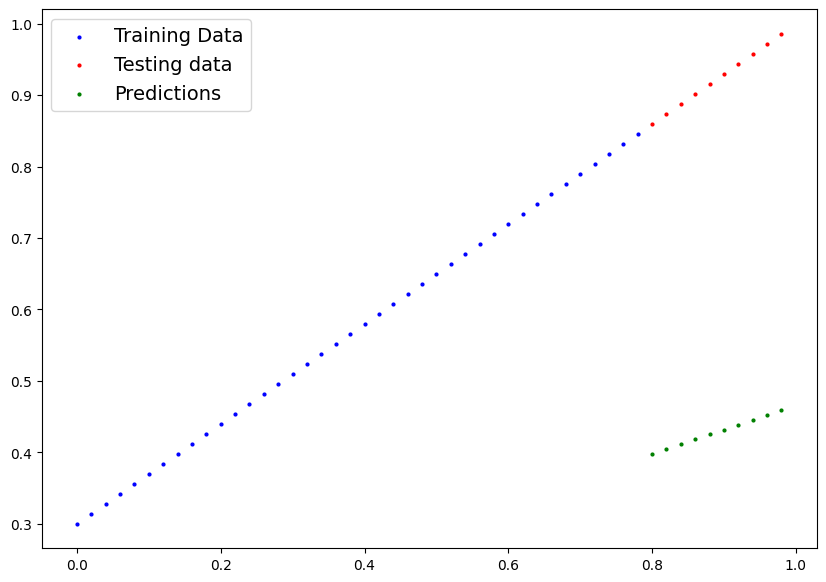

In [16]:
plot_prediction(predictions=y_preds)

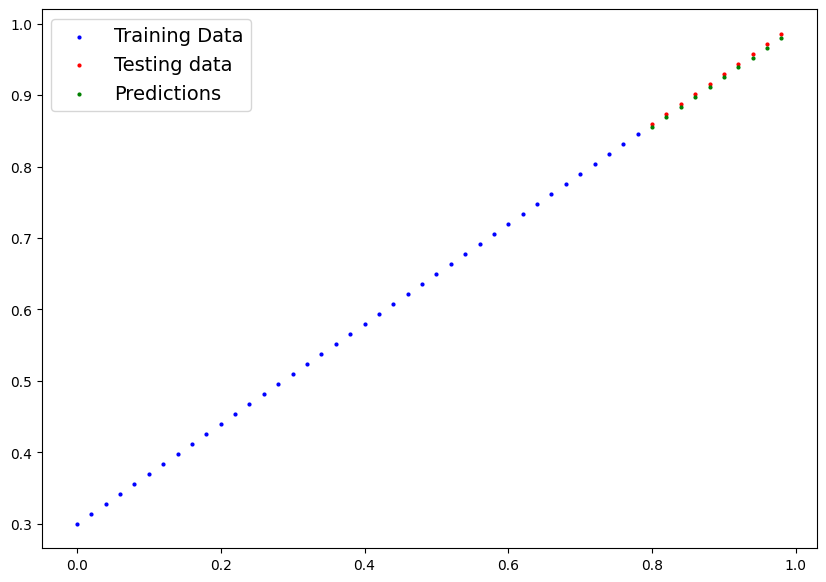

In [17]:
plot_prediction(predictions=Y_preds_new)

##Saving a model in PyTorch
3 main methods to save in PyTorch.
1. "torch.save()" save is pickle format
2. "torch.load()" allows to load a saved PyTorch object
3. "torch.nn.Module.load_state_dict()" load a models saved dictionary

In [18]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])

In [19]:
from pathlib import Path

#1. create a model directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

#2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

#Save the model state dict
print(f"Model save path to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

Model save path to: models/01_pytorch_workflow_model_0.pth


In [20]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1680 Jul 24 19:59 01_pytorch_workflow_model_0.pth


## Loading a PyTorch model

In [21]:
# To load in a saved state_dict we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

#Load the saved state_dict of model_0 (this will update the new instance with pdate parameters)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [22]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])

In [23]:
#Make some predicitions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds


tensor([[0.8554],
        [0.8693],
        [0.8832],
        [0.8971],
        [0.9110],
        [0.9249],
        [0.9388],
        [0.9527],
        [0.9666],
        [0.9805]])

In [24]:
#Comapre loaded model preds with original model preds
y_preds == loaded_model_preds

tensor([[False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False]])

In [25]:
#Make some models preds
model_0.eval()
with torch.inference_mode():
  Y_preds = model_0(X_test)

Y_preds

tensor([[0.8554],
        [0.8693],
        [0.8832],
        [0.8971],
        [0.9110],
        [0.9249],
        [0.9388],
        [0.9527],
        [0.9666],
        [0.9805]])

In [26]:
#Now it should match. Make sure you actually run predictions on the model
Y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

###Putting it all together
Seeing all the steps again practice

In [27]:
#Ipmort PyTOrch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

#Check pytorch version
torch.__version__

'2.6.0+cu124'

##Create Device agnostic code
This means if we've got access to a gpu, our code will use it

In [28]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Device: {device}")

Device: cpu


##Data


In [29]:
#Create some data using the Linear Regression formula of y = mx + b or y = weight * X + bias
weight = 0.7
bias = 0.3

#Create range of values
start = 0
end = 1
step = 0.02

#Create X and Y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1) #without unsqueeze, errors will pop up
Y = weight * X + bias
X[:10], Y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [30]:
#Split data
train_split = int(0.8 * len(X))
X_train, Y_train = X[:train_split], Y[:train_split]
X_test, Y_test = X[train_split:], Y[train_split:]
len(X_train), len(Y_train), len(X_test), len(Y_test)

(40, 40, 10, 10)

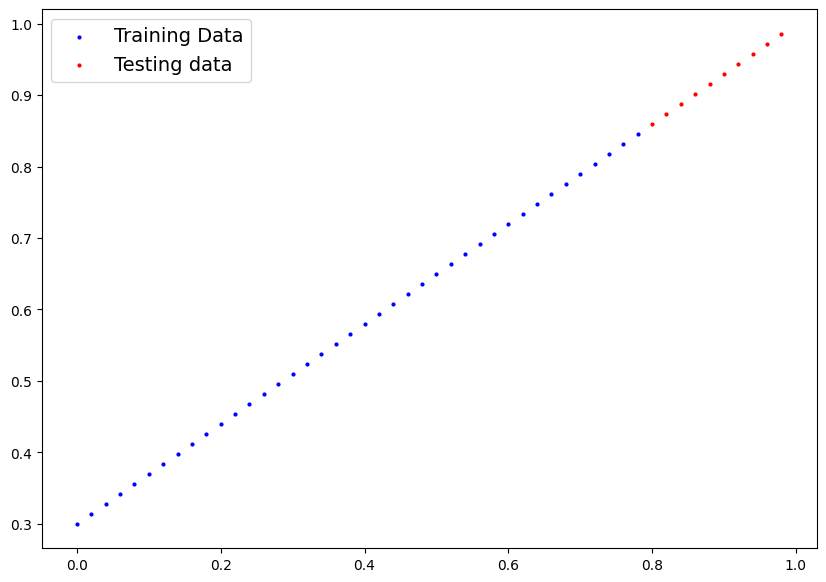

In [31]:
#Plot the data
#Note: If you don't have the plot_predictions() function loaded, this will error
plot_prediction(X_train, Y_train, X_test, Y_test)

In [32]:
##Building a PyTorch Linear Model by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    #Use nn.Linear() for creating the model parameters takes in 1 parameter the outputs 1 for the formula
    #This creates our bias and weight instead of manually doing it
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

#Set the manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [33]:
#Check model current device
next(model_1.parameters()).device


device(type='cpu')

In [34]:
#Set model to use the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cpu')

###TRaining code


Loss function


Optimizer
TRaining Loop
TEsting Loop

In [35]:
#Setup loss function
loss_fn = nn.L1Loss()

#Setup optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)

In [36]:
#Let's write a training loop
torch.manual_seed(42)
epocs = 200

X_train = X_train.to(device)
Y_train = Y_train.to(device)
X_test = X_test.to(device)
Y_test = Y_test.to(device)

for epoch in range(epochs):
  model_1.train()

  #Forward pass
  Y_pred = model_1(X_train)

  #Loss
  loss = loss_fn(Y_pred, Y_train)

  #Optimizer
  optimizer.zero_grad()

  #Perform backpropagation
  loss.backward()

  #optimizer step
  optimizer.step()

  ###Testing

  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)

    test_loss = loss_fn(test_pred, Y_test)

  #Print what is happening
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")



Epoch: 0 | Loss: 0.5551779866218567 | Test loss: 0.5739762187004089
Epoch: 10 | Loss: 0.4399680495262146 | Test loss: 0.4392663538455963
Epoch: 20 | Loss: 0.3247582018375397 | Test loss: 0.30455657839775085
Epoch: 30 | Loss: 0.20954827964305878 | Test loss: 0.16984674334526062
Epoch: 40 | Loss: 0.09433844685554504 | Test loss: 0.03513689711689949
Epoch: 50 | Loss: 0.023886386305093765 | Test loss: 0.04784906655550003
Epoch: 60 | Loss: 0.0199567973613739 | Test loss: 0.04580312222242355
Epoch: 70 | Loss: 0.016517987474799156 | Test loss: 0.0375305712223053
Epoch: 80 | Loss: 0.013089170679450035 | Test loss: 0.029944902285933495
Epoch: 90 | Loss: 0.009653178043663502 | Test loss: 0.02167237363755703
Epoch: 100 | Loss: 0.006215679459273815 | Test loss: 0.014086711220443249
Epoch: 110 | Loss: 0.002787243574857712 | Test loss: 0.005814164876937866
Epoch: 120 | Loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 130 | Loss: 0.0012645035749301314 | Test loss: 0.01380180753767

In [37]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6929]])),
             ('linear_layer.bias', tensor([0.2925]))])

In [38]:
#Turn model into evaluation mode
model_1.eval()

#Make predictions on the test data
with torch.inference_mode():
  Y_preds = model_1(X_test)
Y_preds

tensor([[0.8468],
        [0.8607],
        [0.8746],
        [0.8884],
        [0.9023],
        [0.9161],
        [0.9300],
        [0.9438],
        [0.9577],
        [0.9716]])

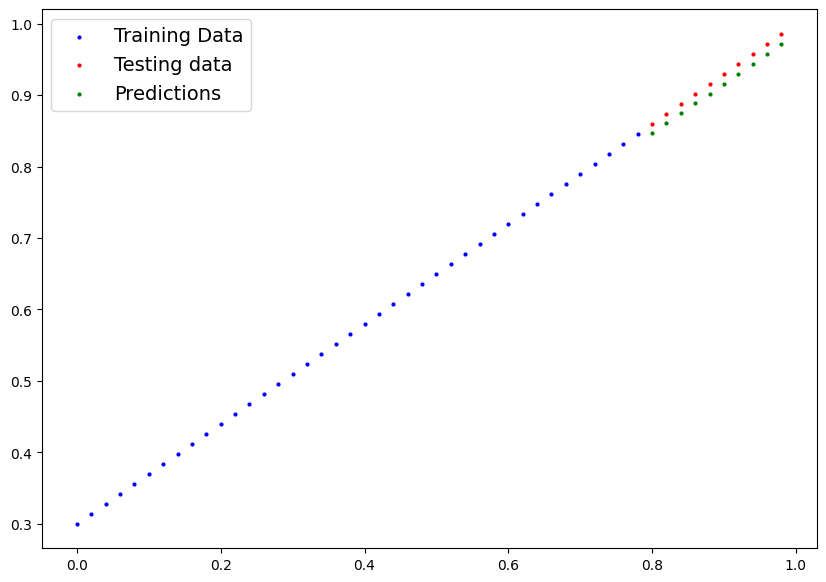

In [39]:
#Check out the model predictions visually
plot_prediction(predictions=Y_preds.cpu())


###Saving and loading a trained model

In [40]:
print(f"Model saved to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)

Model saved to: models/01_pytorch_workflow_model_0.pth


In [41]:
#Load model
loaded_model_1 = LinearRegressionModelV2()

loaded_model_1.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [42]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6929]])),
             ('linear_layer.bias', tensor([0.2925]))])

In [43]:
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_preds = model_1(X_test)

loaded_model_preds

tensor([[0.8468],
        [0.8607],
        [0.8746],
        [0.8884],
        [0.9023],
        [0.9161],
        [0.9300],
        [0.9438],
        [0.9577],
        [0.9716]])

In [44]:
Y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

###Round 3 Practice

In [45]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.6.0+cu124'

In [46]:
device = "cuda" if torch.cuda.is_available() else "cpu"

device

'cpu'

In [47]:
#creating X and Y using Linear Regression
weight = 0.9
bias = 0.3

start = 0
end = 25
steps = 125

X = torch.linspace(start, end, steps=steps).unsqueeze(dim=1)
Y = weight * X + bias
X[:10], Y[:10]

(tensor([[0.0000],
         [0.2016],
         [0.4032],
         [0.6048],
         [0.8065],
         [1.0081],
         [1.2097],
         [1.4113],
         [1.6129],
         [1.8145]]),
 tensor([[0.3000],
         [0.4815],
         [0.6629],
         [0.8444],
         [1.0258],
         [1.2073],
         [1.3887],
         [1.5702],
         [1.7516],
         [1.9331]]))

In [82]:
#Split data
train_split = int(0.8 * len(X))
X_train, Y_train = X[:train_split], Y[:train_split]
X_test, Y_test = X[train_split:], Y[train_split:]
len(X_train), len(Y_train), len(X_test), len(Y_test)

(100, 100, 25, 25)

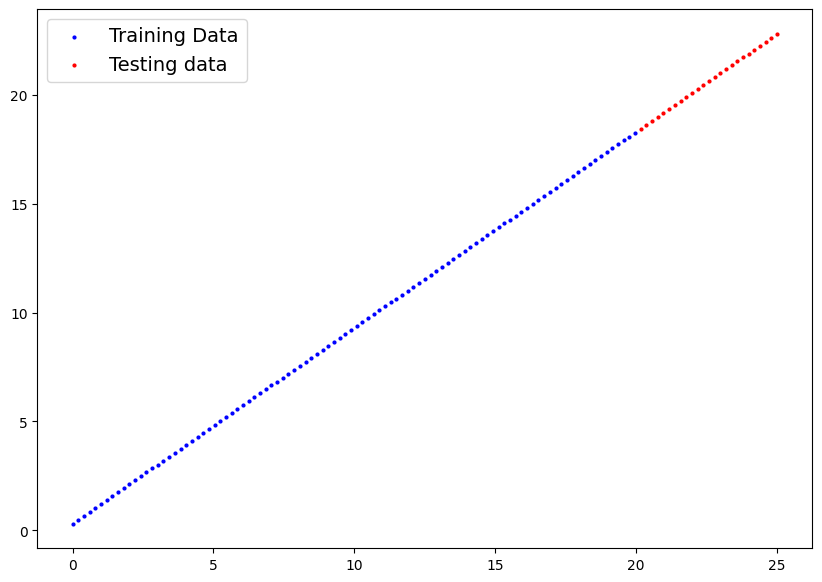

In [83]:
def plot_prediction(train_data=X_train,
                    train_labels=Y_train,
                    test_data=X_test,
                    test_labels=Y_test,
                    predictions=None):
  """Plots training data, test data and compares predictions"""
  plt.figure(figsize=(10, 7))

  #Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training Data")

  #Plot test data in Green
  plt.scatter(test_data, test_labels, c="r", s=4, label="Testing data")

  #Are there predictions
  if predictions is not None:
    #Plot the prediciotns if they exist
    plt.scatter(test_data, predictions, c="g", s=4, label="Predictions")

  plt.legend(prop={"size": 14})

plot_prediction();

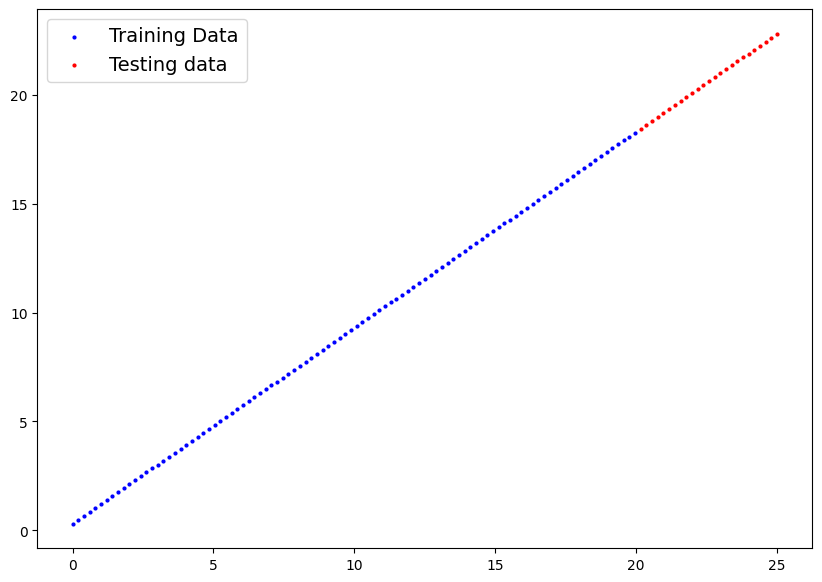

In [84]:
plot_prediction(X_train, Y_train, X_test, Y_test)

In [85]:
class LinearRegressionModelV3(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)

  def forward(self, X: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(X)

torch.manual_seed(42)
model_2 = LinearRegressionModelV3()
model_2, model_2.state_dict()

(LinearRegressionModelV3(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [86]:
model_2.to(device)
next(model_2.parameters()).device

device(type='cpu')

In [87]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(params=model_2.parameters(),
                         lr=0.01)

In [94]:
#Training loop
torch.manual_seed(42)

epochs = 200

X_train = X_train.to(device)
Y_train = Y_train.to(device)
X_test = X_test.to(device)
Y_test = Y_test.to(device)

for epoch in range(epochs):
  model_2.train()

  Y_pred = model_2(X_train)

  loss = loss_fn(Y_pred, Y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  #Testing
  model_2.eval()

  with torch.inference_mode():
    test_preds = model_2(X_test)

    test_loss = loss_fn(test_preds, Y_test)

  if epoch % 10 == 0:
    print(f"Epoch: {epoch}, Loss: {loss}, Test Loss: {test_loss}")

Epoch: 0, Loss: 5.860290009339353e-13, Test Loss: 1.309672422594721e-12
Epoch: 10, Loss: 5.860290009339353e-13, Test Loss: 1.309672422594721e-12
Epoch: 20, Loss: 5.860290009339353e-13, Test Loss: 1.309672422594721e-12
Epoch: 30, Loss: 5.860290009339353e-13, Test Loss: 1.309672422594721e-12
Epoch: 40, Loss: 5.860290009339353e-13, Test Loss: 1.309672422594721e-12
Epoch: 50, Loss: 5.860290009339353e-13, Test Loss: 1.309672422594721e-12
Epoch: 60, Loss: 5.860290009339353e-13, Test Loss: 1.309672422594721e-12
Epoch: 70, Loss: 5.860290009339353e-13, Test Loss: 1.309672422594721e-12
Epoch: 80, Loss: 5.860290009339353e-13, Test Loss: 1.309672422594721e-12
Epoch: 90, Loss: 5.860290009339353e-13, Test Loss: 1.309672422594721e-12
Epoch: 100, Loss: 5.860290009339353e-13, Test Loss: 1.309672422594721e-12
Epoch: 110, Loss: 5.860290009339353e-13, Test Loss: 1.309672422594721e-12
Epoch: 120, Loss: 5.860290009339353e-13, Test Loss: 1.309672422594721e-12
Epoch: 130, Loss: 5.860290009339353e-13, Test Los

In [95]:
model_2.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.9000]])),
             ('linear_layer.bias', tensor([0.3000]))])

In [96]:
#Turn model into evaluation mode
model_2.eval()

#Make predictions on the test data
with torch.inference_mode():
  Y_preds = model_1(X_test)
Y_preds

tensor([[14.2625],
        [14.4022],
        [14.5419],
        [14.6816],
        [14.8213],
        [14.9610],
        [15.1007],
        [15.2404],
        [15.3801],
        [15.5198],
        [15.6595],
        [15.7991],
        [15.9388],
        [16.0785],
        [16.2182],
        [16.3579],
        [16.4976],
        [16.6373],
        [16.7770],
        [16.9167],
        [17.0564],
        [17.1961],
        [17.3358],
        [17.4755],
        [17.6152]])

In [97]:
X.size(), Y.size(),Y_preds.size(), Y_test.size(), X_test.size()

(torch.Size([125, 1]),
 torch.Size([125, 1]),
 torch.Size([25, 1]),
 torch.Size([25, 1]),
 torch.Size([25, 1]))

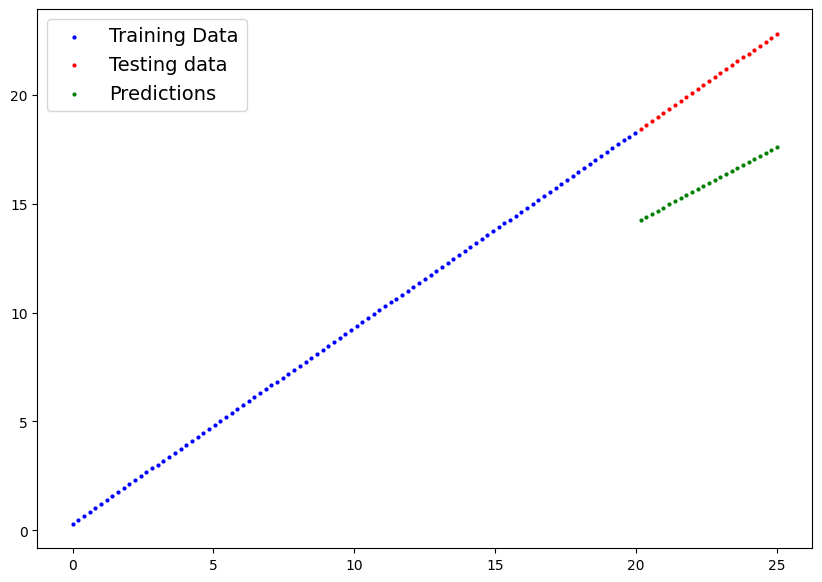

In [101]:
#Check out the model predictions visually
plot_prediction(predictions=Y_preds.cpu())


In [99]:
model_2.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.9000]])),
             ('linear_layer.bias', tensor([0.3000]))])